# Table of Content

- [1.0 Splitting](#1.0)

- [2.0 SGDClassifier (sgdc)](#2.0)

  - [2.1 Build sgdc Model](#2.1)
  - [2.2 Evaluate sgdc Model](#2.2)

- [3.0 Decision-Trees (DTsC)](#3.0)

  - [3.1 Build DTsC Model](#3.1)
  - [3.2 Evaluate DTsC Model](#3.2)

- [4.0 RandomForestClassifier (RFC)](#4.0)

  - [4.1 Build RFC Model](#4.1)
  - [4.2 Evaluate RFC Model](#4.2)


In [98]:
# algebra
import numpy as np

# dataframes
import pandas as pd

# EDA & visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# log
import math
import warnings


# spliting and optimizing models
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# linear model
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
    Lasso,
    Ridge,
    ElasticNet,
)

# Trees
from sklearn.tree import plot_tree, DecisionTreeClassifier, ExtraTreeClassifier

from sklearn.compose import ColumnTransformer

# Ensembles
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingClassifier,
)

# SVMs
from sklearn.svm import SVC

# Feature preprocessing
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    FunctionTransformer,
)

# Model scoring
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    confusion_matrix,
    classification_report,
)

# model pipelining
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier

# Selection
from sklearn.feature_selection import (
    chi2,
    VarianceThreshold,
    f_classif,
    SelectKBest,
    SelectPercentile,
    SequentialFeatureSelector,
)

from xgboost import XGBClassifier


pd.options.display.max_columns = None
warnings.filterwarnings("ignore")

In [99]:
bank_df_test = pd.read_csv(
    r"/home/ahmed/Ai/Kaggle-Competitions-Notebooks/Binary Classification with a Bank Churn Dataset/Preprocesse datasets/test_processed.csv"
)
bank_df_train = pd.read_csv(
    r"/home/ahmed/Ai/Kaggle-Competitions-Notebooks/Binary Classification with a Bank Churn Dataset/Preprocesse datasets/train_processed.csv",
)
bank_df_test.drop(columns=["Unnamed: 0"], axis="columns", inplace=True)
bank_df_train.drop(columns=["Unnamed: 0"], axis="columns", inplace=True)

# [1.0 Splitting](#1.0)


In [100]:
feature = bank_df_train.drop(columns=["target"], axis=1)
test = bank_df_train["target"]

x_train, x_test, y_train, y_test = train_test_split(
    feature, test, test_size=0.3, random_state=42
)

# [2.0 SGDClassifier (sgdc)](#2.0)


[2.1 Build sgdc Model](#2.1)


In [101]:
def build_SGD(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
    train_score, test_score, used_alphas = [], [], []

    alpha = [
        0.00001,
        0.00002,
        0.00003,
        0.00004,
        0.00005,
        0.00006,
    ]

    alpha.sort()
    for alp in alpha:
        scaler = StandardScaler()
        Log_FT = FunctionTransformer(func=np.log1p)
        CT = ColumnTransformer(
            transformers=[
                ("StandardScaler", scaler, x_train.columns),
            ],
            remainder="passthrough",
        )
        SGD = SGDClassifier(loss="log_loss", penalty="l1", alpha=alp, random_state=42)

        pip = Pipeline(steps=[("ColumnTransformer", CT), ("SGDClassifier", SGD)])

        pip.fit(x_train, y_train)

        train_acc = pip.score(x_train, y_train)
        test_acc = pip.score(x_test, y_test)
        train_score.append(train_acc)
        test_score.append(test_acc)
        used_alphas.append(alp)

    return train_score, test_score, used_alphas


train_score, test_score, used_alphas = build_SGD()

[2.2 Evaluate sgdc Model](#2.2)


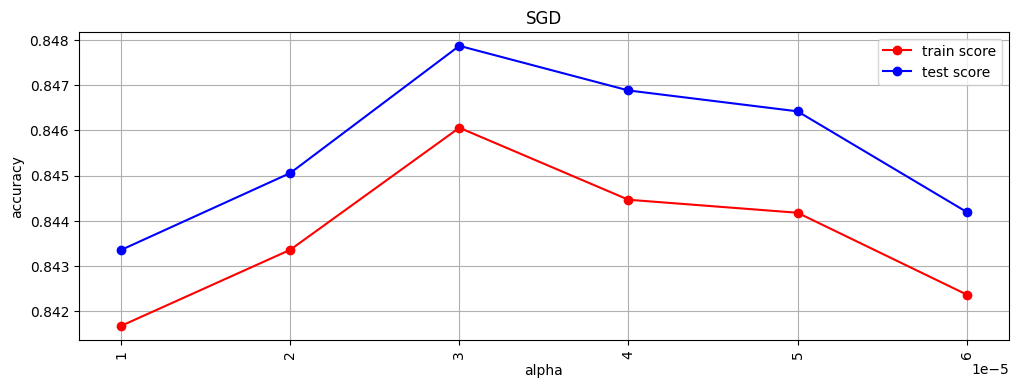

In [102]:
def evaluate_SGD(
    train_score=train_score, test_score=test_score, used_alphas=used_alphas
):
    plt.figure(figsize=(12, 4))

    plt.plot(used_alphas, train_score, color="red", marker="o", label="train score")
    plt.plot(used_alphas, test_score, color="blue", marker="o", label="test score")

    plt.xlabel("alpha")
    plt.ylabel("accuracy")
    plt.title("SGD")
    plt.grid(True)
    plt.xticks(used_alphas, rotation=90)
    plt.legend()
    plt.show()
    return


evaluate_SGD()

In [103]:
scaler = StandardScaler()
Log_FT = FunctionTransformer(func=np.log1p)
CT = ColumnTransformer(
    transformers=[
        (
            "FunctionTransformer",
            Log_FT,
            ["balance", "salary", "balance_salary"],
        ),
        ("StandardScaler", scaler, x_train.columns),
    ],
    remainder="passthrough",
)
SGD = SGDClassifier(loss="log_loss", penalty="l1", alpha=4 * 1e-5, random_state=42)

pip = Pipeline(steps=[("StandardScaler", scaler), ("SGDClassifier", SGD)])

pip.fit(x_train, y_train)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('SGDClassifier',
                 SGDClassifier(alpha=4e-05, loss='log_loss', penalty='l1',
                               random_state=42))])

In [104]:
train_acc = pip.score(x_train, y_train)
test_acc = pip.score(x_test, y_test)
train_acc, test_acc

(0.844462481962482, 0.8468855218855219)

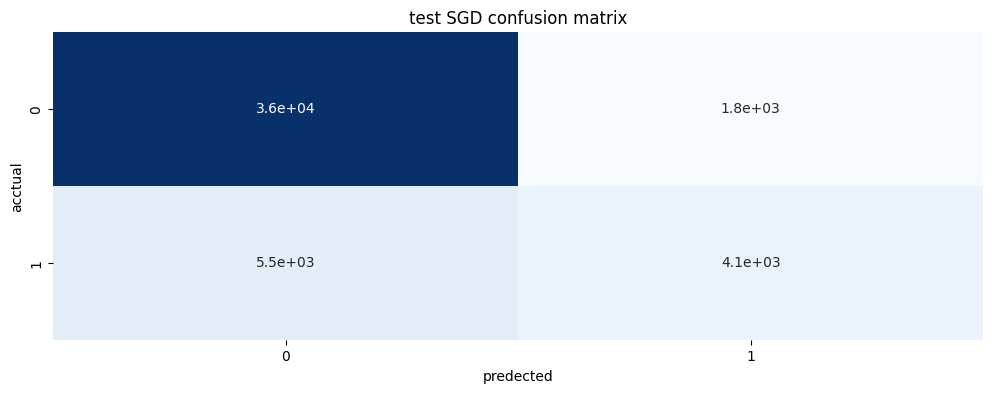

In [105]:
y_pred = pip.predict(x_test)

cm_SGD = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SGD, annot=True, cmap="Blues", cbar=False)
plt.title("test SGD confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [106]:
y_pred_train = SGD.predict(x_train)
y_pred__test = SGD.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     88090
           1       0.21      1.00      0.34     22790

    accuracy                           0.21    110880
   macro avg       0.10      0.50      0.17    110880
weighted avg       0.04      0.21      0.07    110880

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     37895
           1       0.20      1.00      0.34      9625

    accuracy                           0.20     47520
   macro avg       0.10      0.50      0.17     47520
weighted avg       0.04      0.20      0.07     47520



# [3.0 Decision-Trees (DTsC)](#3.0)


[3.1 Build DTsC Model](#3.1)


In [107]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(x_train, y_train)
DTC.score(x_train, y_train), DTC.score(x_test, y_test)

(0.9998286435786435, 0.8012415824915825)

[3.2 Evaluate DTsC Model](#3.2)


In [108]:
path = DTC.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]

used = []
models = []
for i in range(20):
    alpha = np.random.randint(len(alphas) - 1)
    used.append(alphas[alpha])
    DTC = DecisionTreeClassifier(random_state=42, ccp_alpha=alphas[alpha])
    DTC.fit(x_train, y_train)
    models.append(DTC)

In [109]:
train_score = [DTC_.score(x_train, y_train) for DTC_ in models]
test_score = [DTC_.score(x_test, y_test) for DTC_ in models]

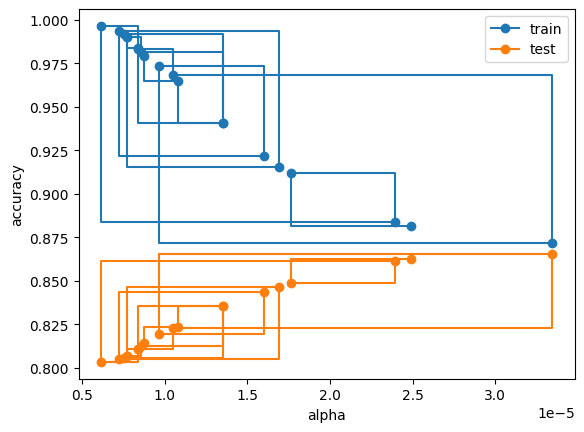

In [110]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(used, train_score, marker="o", label="train", drawstyle="steps-post")
ax.plot(used, test_score, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

In [111]:
alpha = 3.864144743688983e-05

DTC = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
DTC.fit(x_train, y_train)
DTC.score(x_train, y_train), DTC.score(x_test, y_test)

(0.8696789321789322, 0.8670664983164983)

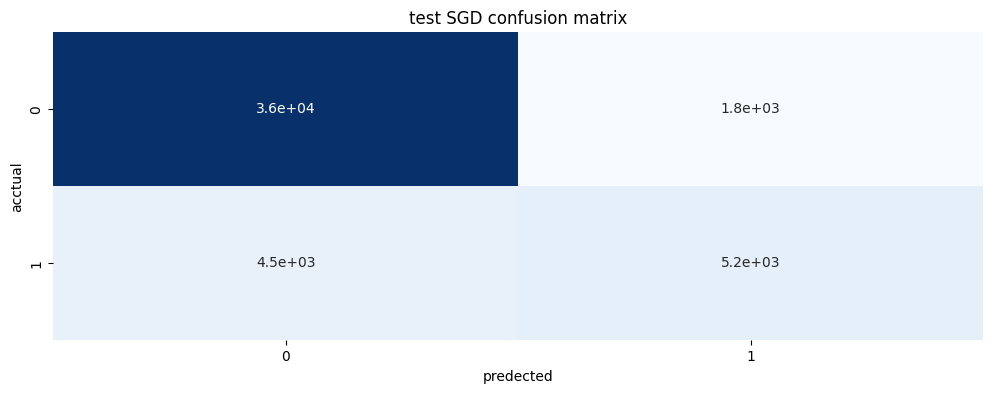

In [112]:
y_pred = DTC.predict(x_test)

cm_DTC = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_DTC, annot=True, cmap="Blues", cbar=False)
plt.title("test SGD confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [113]:
y_pred_train = DTC.predict(x_train)
y_pred__test = DTC.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     88090
           1       0.75      0.54      0.63     22790

    accuracy                           0.87    110880
   macro avg       0.82      0.75      0.78    110880
weighted avg       0.86      0.87      0.86    110880

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     37895
           1       0.74      0.54      0.62      9625

    accuracy                           0.87     47520
   macro avg       0.81      0.74      0.77     47520
weighted avg       0.86      0.87      0.86     47520



# [4.0 RandomForestClassifier (RFC)](#4.0)


[4.1 Build RFC Model](#4.1)


In [114]:
RF = RandomForestClassifier(criterion="gini", n_estimators=30, random_state=42)
RF.fit(x_train, y_train)
print(RF.score(x_train, y_train)), print(RF.score(x_test, y_test))

0.9976461038961039
0.8607323232323232


(None, None)

In [118]:
Ids = bank_df_test["id"]
test = bank_df_test.drop(columns=["id"], axis=1)
prediction = DTC.predict(test)
submmition = pd.DataFrame({"id": Ids, "Exited": prediction})
submmition.to_csv(
    "/home/ahmed/Ai/Kaggle-Competitions-Notebooks/Binary Classification with a Bank Churn Dataset/Note bookls/Piplines/submission.csv",
    index=False,
)